<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B02%5D_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# La régression linéaire : solution en forme close et descente de gradient

## Données
On commence par générer des données. Les données en entrée seront dans $\mathbb{R}$, et pour chaque point $x_i \in \mathbb{R}$, il faudra prédire un $y_i \in \mathbb{R}$.

In [48]:
import numpy as np
nb_points = 30
true_w = -.8
true_b = .5
data_x = np.random.rand(nb_points, 1)
data_y = data_x * true_w + true_b + np.random.randn(nb_points, 1) * .1

In [49]:
print('données en entrée\n', data_x)
print('données à prédire\n', data_y)

données en entrée
 [[0.2557562 ]
 [0.06620197]
 [0.41294784]
 [0.12686107]
 [0.17311312]
 [0.79961948]
 [0.13064261]
 [0.46998999]
 [0.78977311]
 [0.01818181]
 [0.94221492]
 [0.74554939]
 [0.35047854]
 [0.75765825]
 [0.94346925]
 [0.51080657]
 [0.96304663]
 [0.65244468]
 [0.34533933]
 [0.27386111]
 [0.56335297]
 [0.84819442]
 [0.48652015]
 [0.91058763]
 [0.51152128]
 [0.28338868]
 [0.69631618]
 [0.61503478]
 [0.34634637]
 [0.21972102]]
données à prédire
 [[ 0.3762079 ]
 [ 0.43216331]
 [ 0.24304512]
 [ 0.37643298]
 [ 0.22735353]
 [-0.12911218]
 [ 0.34996076]
 [ 0.17679628]
 [-0.27739653]
 [ 0.48292397]
 [-0.27469179]
 [-0.21241954]
 [ 0.25540224]
 [-0.17053981]
 [-0.35130053]
 [ 0.03283693]
 [-0.26966884]
 [ 0.08174006]
 [ 0.08422219]
 [ 0.46383594]
 [-0.05047137]
 [-0.25350455]
 [-0.1221731 ]
 [-0.1796944 ]
 [-0.03002667]
 [ 0.34621643]
 [-0.15160261]
 [ 0.23183072]
 [ 0.25335026]
 [ 0.35418219]]


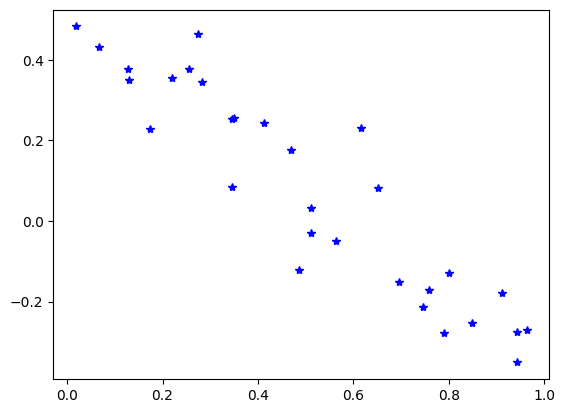

In [50]:
import matplotlib.pyplot as plt
plt.plot(data_x, data_y, '*b')
plt.show()

In [52]:
w = np.random.randn()
b = np.random.randn()

## Visualisation du modèle

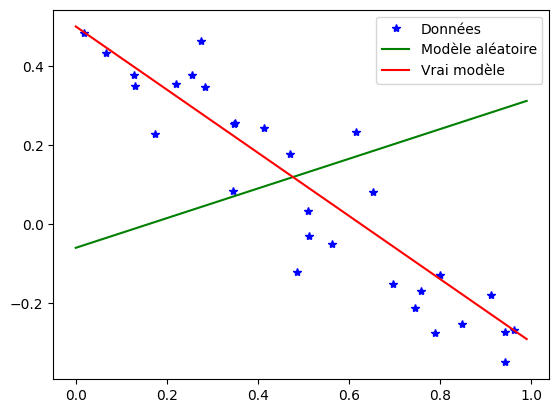

In [53]:
plt.plot(data_x, data_y, '*b')
o = np.arange(0, 1, .01)
a = w * o + b
plt.plot(o, a, '-g')
true_a = true_w * o + true_b
plt.plot(o, true_a, '-r')
plt.legend(['Données', 'Modèle aléatoire', 'Vrai modèle'])
plt.show()

# Exercices

## 1
Calculer l'Erreur Quadratique Moyenne (EQM) du modèle $\frac{1}{K}∑_{i=0}^{K-1} (\hat{y_i} - y_i)^2$ où $\hat{y_i} = w x_i + b$

In [54]:
res = 0
for i in range(len(data_x)):
  res += ((np.dot(w,data_x[i])+b)-data_y[i])**2
res = res / len(data_x)
print(res)

[0.13283166]


## 2
Trouver `w_opt` et `b_opt` qui minimisent l'EQM. S'assurer que l'EQM de ce modèle est inférieure à l'EQM du modèle aléatoire calculé en 1, et vérifier que le gradient de l'EQM est nul en `(w_opt, b_opt)`



In [55]:
Z = np.ones((nb_points, 2))
Z[:, 1] = data_x.flatten()
print(Z)

[[1.         0.2557562 ]
 [1.         0.06620197]
 [1.         0.41294784]
 [1.         0.12686107]
 [1.         0.17311312]
 [1.         0.79961948]
 [1.         0.13064261]
 [1.         0.46998999]
 [1.         0.78977311]
 [1.         0.01818181]
 [1.         0.94221492]
 [1.         0.74554939]
 [1.         0.35047854]
 [1.         0.75765825]
 [1.         0.94346925]
 [1.         0.51080657]
 [1.         0.96304663]
 [1.         0.65244468]
 [1.         0.34533933]
 [1.         0.27386111]
 [1.         0.56335297]
 [1.         0.84819442]
 [1.         0.48652015]
 [1.         0.91058763]
 [1.         0.51152128]
 [1.         0.28338868]
 [1.         0.69631618]
 [1.         0.61503478]
 [1.         0.34634637]
 [1.         0.21972102]]


In [56]:
b,w = np.linalg.inv(Z.T @ Z) @ Z.T @ data_y

[0.50869044]
[-0.85244697]


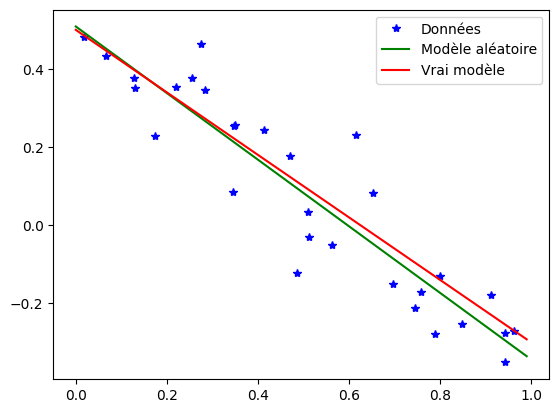

In [61]:
print(b)
print(w)
plt.plot(data_x, data_y, '*b')
o = np.arange(0, 1, .01)
a = w * o + b
plt.plot(o, a, '-g')
true_a = true_w * o + true_b
plt.plot(o, true_a, '-r')
plt.legend(['Données', 'Modèle aléatoire', 'Vrai modèle'])
plt.show()

## 3
Soit les nouvelles données `data_x_test`. Calculer la prédiction de votre modèle pour ces données et afficher graphiquement les données, les prédictions et le modèle ayant généré les données initiales

In [60]:
nb_points_test = 10
data_x_test = np.random.rand(nb_points_test, 1)

In [59]:
data_y

array([[ 0.3762079 ],
       [ 0.43216331],
       [ 0.24304512],
       [ 0.37643298],
       [ 0.22735353],
       [-0.12911218],
       [ 0.34996076],
       [ 0.17679628],
       [-0.27739653],
       [ 0.48292397],
       [-0.27469179],
       [-0.21241954],
       [ 0.25540224],
       [-0.17053981],
       [-0.35130053],
       [ 0.03283693],
       [-0.26966884],
       [ 0.08174006],
       [ 0.08422219],
       [ 0.46383594],
       [-0.05047137],
       [-0.25350455],
       [-0.1221731 ],
       [-0.1796944 ],
       [-0.03002667],
       [ 0.34621643],
       [-0.15160261],
       [ 0.23183072],
       [ 0.25335026],
       [ 0.35418219]])

## 4

Calculer la dérivée de l'EQM par rapport à `w` et `b` (sur papier)

## 5
Coder l'algorithme de descente de gradient pour la régression linéaire. Comparer le modèle obtenu avec la solution en forme close

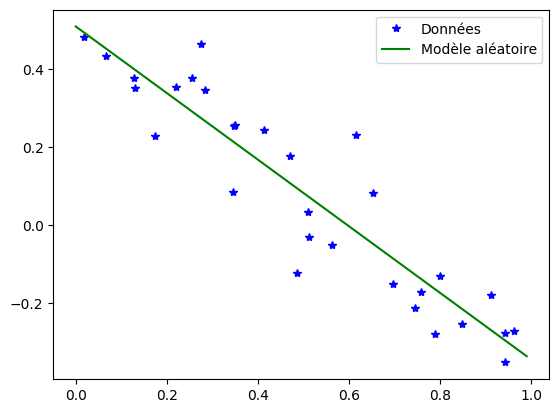

In [77]:
alpha = 0.1
w = np.random.randn()
b = np.random.randn()
for i in range(1000):
  Dw = 0
  Db = 0
  for k in range(nb_points):
    Dw += 2*data_x[k]*((np.dot(w,data_x[k])+b)-data_y[k])
    Db += 2*((np.dot(w,data_x[k])+b)-data_y[k])
  Dw = Dw/nb_points
  Db = Db/nb_points
  w = w - alpha*Dw
  b = b - alpha*Db


plt.plot(data_x, data_y, '*b')
o = np.arange(0, 1, .01)
a = w * o + b
plt.plot(o, a, '-g')
plt.legend(['Données', 'Modèle aléatoire'])
plt.show()